In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import Javascript
import getpass

In [3]:
password = None
if password is None:
    password = getpass.getpass()

In [3]:
!echo $password | sudo -S mount -t tmpfs -o size=20g tmpfs /mnt/tmpfs/
!head -c 20G /dev/urandom >  /mnt/tmpfs/data

[sudo] password for fbdtemme: 

In [4]:
pwd = "/mnt/tmpfs"
max_threads = 4
iterations = 3
target = 'data'

In [5]:
fs = !du -b $pwd/$target | grep -o "[0-9]*"
file_size = int(fs[0])

In [6]:
file_size

21474836480

In [7]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [8]:
def parse_real_time(data: str):
    results = []
    match = re.search(R"real\s(\d+)m([\d.]+)s", data)
    minutes = float(match.group(1))
    seconds = float(match.group(2))
    return minutes * 60 + seconds

def parse_real_time_sequence(data: str):
    results = []
    for match in re.findall(R"real\s(\d+)m([\d.]+)s", data):
        print(match[0])
        print(match[1])
        minutes = float(match[0])
        seconds = float(match[1])
        results.append(minutes * 60 + seconds)
    return results

In [9]:
data = {}

In [10]:
def run_benchmark(name: str, use_threads:bool = True):
    duration = np.ndarray(shape=(iterations, max_threads))
    
    if use_threads:
        for t in range(1, max_threads+1):
            for i in range(0, iterations):
                result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
                result_str = '\n'.join(result)
                print(f"-- iteration {i+1} | threads {t}\n{result_str}")
                duration[i, t-1] = parse_real_time(result_str)
    else:
        for i in range(0, iterations):
            t = 1
            result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
            result_str = '\n'.join(result)
            print(f"-- iteration {i+1} | threads {t}\n{result_str}")
            duration[i, :] = parse_real_time(result_str)

    speed = file_size / duration
    mean = np.mean(speed, axis=0)
    std  = np.std(speed, axis=0)
    return (mean, std)

### mktorrent

In [163]:
mktorrent_data = run_benchmark("mktorrent")

-- iteration 1 | threads 1

real	0m24.658s
user	0m24.564s
sys	0m4.014s

-- iteration 2 | threads 1

real	0m26.743s
user	0m26.588s
sys	0m6.149s

-- iteration 3 | threads 1

real	0m25.067s
user	0m25.211s
sys	0m4.936s

-- iteration 1 | threads 2

real	0m12.336s
user	0m24.587s
sys	0m3.970s

-- iteration 2 | threads 2

real	0m12.345s
user	0m24.662s
sys	0m3.876s

-- iteration 3 | threads 2

real	0m12.350s
user	0m24.630s
sys	0m3.896s

-- iteration 1 | threads 3

real	0m8.320s
user	0m24.733s
sys	0m4.106s

-- iteration 2 | threads 3

real	0m8.427s
user	0m25.103s
sys	0m4.126s

-- iteration 3 | threads 3

real	0m10.355s
user	0m29.589s
sys	0m5.067s

-- iteration 1 | threads 4

real	0m7.202s
user	0m28.176s
sys	0m4.462s

-- iteration 2 | threads 4

real	0m6.749s
user	0m26.623s
sys	0m4.683s

-- iteration 3 | threads 4

real	0m6.538s
user	0m25.863s
sys	0m4.455s



In [148]:
torrenttools_openssl_data = run_benchmark("torrenttools_openssl")

-- iteration 1 | threads 1

real	0m25.037s
user	0m25.866s
sys	0m4.253s

-- iteration 2 | threads 1

real	0m25.036s
user	0m25.846s
sys	0m4.554s

-- iteration 3 | threads 1

real	0m25.036s
user	0m25.782s
sys	0m4.581s

-- iteration 1 | threads 2

real	0m13.032s
user	0m26.208s
sys	0m4.615s

-- iteration 2 | threads 2

real	0m13.032s
user	0m26.199s
sys	0m4.722s

-- iteration 3 | threads 2

real	0m13.033s
user	0m26.259s
sys	0m4.805s

-- iteration 1 | threads 3

real	0m8.843s
user	0m26.037s
sys	0m4.552s

-- iteration 2 | threads 3

real	0m8.631s
user	0m25.714s
sys	0m4.321s

-- iteration 3 | threads 3

real	0m8.841s
user	0m26.020s
sys	0m4.430s

-- iteration 1 | threads 4

real	0m6.640s
user	0m25.525s
sys	0m4.262s

-- iteration 2 | threads 4

real	0m6.639s
user	0m25.691s
sys	0m4.259s

-- iteration 3 | threads 4

real	0m6.430s
user	0m25.464s
sys	0m4.227s



In [177]:
torrenttools_isal_data = run_benchmark("torrenttools_isal")

-- iteration 1 | threads 1

real	0m8.834s
user	0m8.615s
sys	0m4.127s

-- iteration 2 | threads 1

real	0m9.036s
user	0m8.813s
sys	0m4.298s

-- iteration 3 | threads 1

real	0m9.035s
user	0m8.732s
sys	0m4.267s

-- iteration 1 | threads 2

real	0m4.839s
user	0m9.246s
sys	0m4.572s

-- iteration 2 | threads 2

real	0m5.239s
user	0m9.935s
sys	0m4.668s

-- iteration 3 | threads 2

real	0m5.036s
user	0m9.433s
sys	0m4.626s

-- iteration 1 | threads 3

real	0m5.045s
user	0m11.723s
sys	0m4.717s

-- iteration 2 | threads 3

real	0m5.048s
user	0m12.280s
sys	0m4.794s

-- iteration 3 | threads 3

real	0m5.045s
user	0m11.848s
sys	0m4.781s

-- iteration 1 | threads 4

real	0m5.036s
user	0m12.315s
sys	0m4.881s

-- iteration 2 | threads 4

real	0m5.046s
user	0m12.140s
sys	0m4.872s

-- iteration 3 | threads 4

real	0m5.046s
user	0m12.136s
sys	0m4.863s



In [14]:
imdl_data = run_benchmark("imdl", use_threads=False)

-- iteration 1 | threads 1

real	0m49.640s
user	0m45.046s
sys	0m4.038s

-- iteration 2 | threads 1

real	0m48.473s
user	0m44.369s
sys	0m3.654s

-- iteration 3 | threads 1

real	0m54.762s
user	0m47.667s
sys	0m5.675s



In [15]:
dottorrent_cli_data = run_benchmark("dottorrent-cli", use_threads=False)

-- iteration 1 | threads 1

real	0m45.398s
user	0m32.861s
sys	0m11.519s

-- iteration 2 | threads 1

real	0m46.758s
user	0m33.550s
sys	0m12.022s

-- iteration 3 | threads 1

real	0m46.282s
user	0m33.563s
sys	0m11.964s



In [16]:
pyrocore_data = run_benchmark("pyrocore", use_threads=False)

-- iteration 1 | threads 1

real	0m29.641s
user	0m25.230s
sys	0m4.039s

-- iteration 2 | threads 1

real	0m30.556s
user	0m25.640s
sys	0m4.534s

-- iteration 3 | threads 1

real	0m32.703s
user	0m26.834s
sys	0m5.418s



In [17]:
transmission_create_data = run_benchmark("transmission-create", use_threads=False)

-- iteration 1 | threads 1

real	0m33.512s
user	0m26.585s
sys	0m4.951s

-- iteration 2 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m30.008s
user	0m25.216s
sys	0m4.041s

-- iteration 3 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m29.511s
user	0m25.037s
sys	0m3.791s



In [18]:
py3createtorrent_data = run_benchmark("py3createtorrent", use_threads=False)

-- iteration 1 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m28.100s
user	0m24.199s
sys	0m3.405s

-- iteration 2 | threads 1

real	0m27.531s
user	0m23.952s
sys	0m3.169s

-- iteration 3 | threads 1

real	0m28.172s
user	0m23.977s
sys	0m3.270s



In [19]:
torf_data = run_benchmark("torf-cli")

-- iteration 1 | threads 1

real	0m25.609s
user	0m23.964s
sys	0m9.948s

-- iteration 2 | threads 1

real	0m24.994s
user	0m23.313s
sys	0m9.235s

-- iteration 3 | threads 1

real	0m25.388s
user	0m23.761s
sys	0m9.512s

-- iteration 1 | threads 2

real	0m13.950s
user	0m24.642s
sys	0m10.750s

-- iteration 2 | threads 2

real	0m14.088s
user	0m24.869s
sys	0m11.001s

-- iteration 3 | threads 2

real	0m14.410s
user	0m25.176s
sys	0m11.003s

-- iteration 1 | threads 3

real	0m10.548s
user	0m25.179s
sys	0m10.208s

-- iteration 2 | threads 3

real	0m10.801s
user	0m24.889s
sys	0m10.453s

-- iteration 3 | threads 3

real	0m10.447s
user	0m24.213s
sys	0m10.145s

-- iteration 1 | threads 4

real	0m10.540s
user	0m27.706s
sys	0m10.462s

-- iteration 2 | threads 4

real	0m10.492s
user	0m28.131s
sys	0m10.342s

-- iteration 3 | threads 4

real	0m10.702s
user	0m25.584s
sys	0m10.397s



In [20]:
buildtorrent_data = run_benchmark("buildtorrent", use_threads=False)

-- iteration 1 | threads 1

real	0m46.673s
user	0m41.712s
sys	0m4.031s

-- iteration 2 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m45.859s
user	0m41.532s
sys	0m3.884s

-- iteration 3 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m45.836s
user	0m41.261s
sys	0m3.952s



In [ ]:
maketorrent_data = run_benchmark("maketorrent")

In [ ]:
benchmark_data = {
    "mktorrent": mktorrent_data, 
    "imdl": imdl_data,
    "dottorrent-cli": dottorrent_cli_data,
    "pyrocore": pyrocore_data,
    "transmission-create": transmission_create_data,
    "py3createtorrent" : py3createtorrent_data,
    "torf-cli": torf_data,
    "buildtorrent": buildtorrent_data,
    # "maketorrent" : maketorrent_data,
    "torrenttools (OpenSSL)": torrenttools_openssl_data,
    "torrenttools (ISA-L)": torrenttools_isal_data,
}

In [ ]:
programs = list(benchmark_data.keys())
threads = list(range(1, max_threads+1))
index = pd.MultiIndex.from_product((threads, programs), names=["threads", "programs"])

speed_mean_data = {}
speed_stddev_data = {}
for program, data in benchmark_data.items():
    speed_mean_data[program] = data[0]
    speed_stddev_data[program] = data[1]
    

speed_mean = pd.DataFrame(speed_mean_data).stack()
speed_stddev = pd.DataFrame(speed_stddev_data).stack()

In [ ]:
df = pd.DataFrame()
df["speed_mean"], df["speed_stddev"] = speed_mean / 1e6, speed_stddev / 1e6
df.index = index

In [181]:
# df.to_csv("benchmark.csv")

In [34]:
df = pd.read_csv("benchmark.csv")
df.set_index(["threads","programs"], inplace=True)

In [35]:
df

speed_mean  speed_stddev
threads programs                                         
1       mktorrent                843.537581     29.240162
        imdl                     422.595602     21.945212
        dottorrent-cli           465.436936      5.708141
        pyrocore                 694.654299     28.286594
        transmission-create      694.712205     38.430640
        py3createtorrent         768.842932      7.946208
        torf-cli                 847.877094      8.542898
        buildtorrent             465.635634      3.906536
        torrenttools (OpenSSL)   857.746867      0.016150
        torrenttools (ISA-L)    2394.788777     25.555998
2       mktorrent               1739.745717      0.816567
        imdl                     422.595602     21.945212
        dottorrent-cli           465.436936      5.708141
        pyrocore                 694.654299     28.286594
        transmission-create      694.712205     38.430640
        py3createtorrent         768.842932      7.946208
        torf-cli                1518.007778     20.554861
        buildtorrent             465.635634      3.906536
        torrenttools (OpenSSL)  1647.812096      0.059603
        torrenttools (ISA-L)    4267.054895    138.342107
3       mktorrent               2401.102928    231.781078
        imdl                     422.595602     21.945212
        dottorrent-cli           465.436936      5.708141
        pyrocore                 694.654299     28.286594
        transmission-create      694.712205     38.430640
        py3createtorrent         768.842932      7.946208
        torf-cli                2026.580190     28.285421
        buildtorrent             465.635634      3.906536
        torrenttools (OpenSSL)  2448.522212     27.990339
        torrenttools (ISA-L)    4255.814143      1.192516
4       mktorrent               3149.445056    125.745769
        imdl                     422.595602     21.945212
        dottorrent-cli           465.436936      5.708141
        pyrocore                 694.654299     28.286594
        transmission-create      694.712205     38.430640
        py3createtorrent         768.842932      7.946208
        torf-cli                2030.287245     17.163154
        buildtorrent             465.635634      3.906536
        torrenttools (OpenSSL)  3269.533110     49.678067
        torrenttools (ISA-L)    4258.630736      3.983737

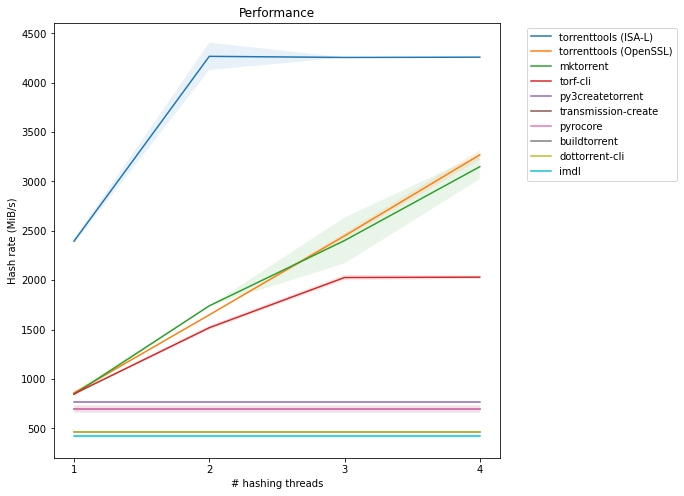

In [38]:
import matplotlib.cm
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

programs = df.index.unique(level=1)
threads = df.index.unique(level=0)
programs_by_max_speed = {}

for program in programs:
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    programs_by_max_speed[program] = np.max(sm)

sorted_programs = sorted(programs_by_max_speed.keys(), key=lambda x : programs_by_max_speed[x], reverse=True)

for idx, program in enumerate(sorted_programs):
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    sd = df.loc[df.index.get_level_values(1) == program, "speed_stddev"]
    ax.plot(threads, sm)
    ax.fill_between(threads, sm - sd, sm + sd, alpha=0.1)

ax.set_title("Performance")
ax.set_xlabel("# hashing threads")
ax.set_ylabel("Hash rate (MiB/s)")
ax.set_xticks(list(range(1, max_threads+1)))
ax.legend(sorted_programs, bbox_to_anchor=(1.05, 1), loc='upper left')
fig.patch.set_facecolor("white")